# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer, confusion_matrix

# Importing the data

In [2]:
import os 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
os.chdir("/content/gdrive/Shareddrives/Data 240")

In [4]:
data=pd.read_csv("bank_additional_full.csv")

## General Information
### Outliers:
    1. Q1 (Quartile 1): 25%
    2. Q2 (Quartile 2): 50%
    3. Q3 (Quartile 3): 75%
    InterQuartile Range (IQR) : Q3 - Q1
    Outlier Range: < Q1 - (IQR*1.5) or > Q3 + (IQR*1.5)
    In this Project: Outliers are replaced with the median 

In [5]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,False
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,True


### There are 41,188 rows with 21 columns in the dataset.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [7]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

### Description
Division of columns using Column Data Type
1. Total Columns: 21
2. Columns Int Type: 5
3. Columns Float Type: 5
4. columns Categorical Type: 10
5. Target Columns Type: bool

#### 1.1 Age

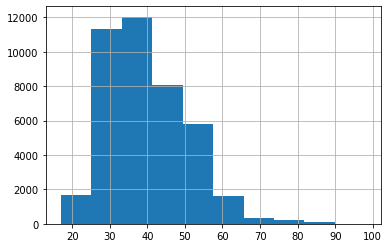

In [8]:
data['age'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b0913d30>,
      dtype=object)

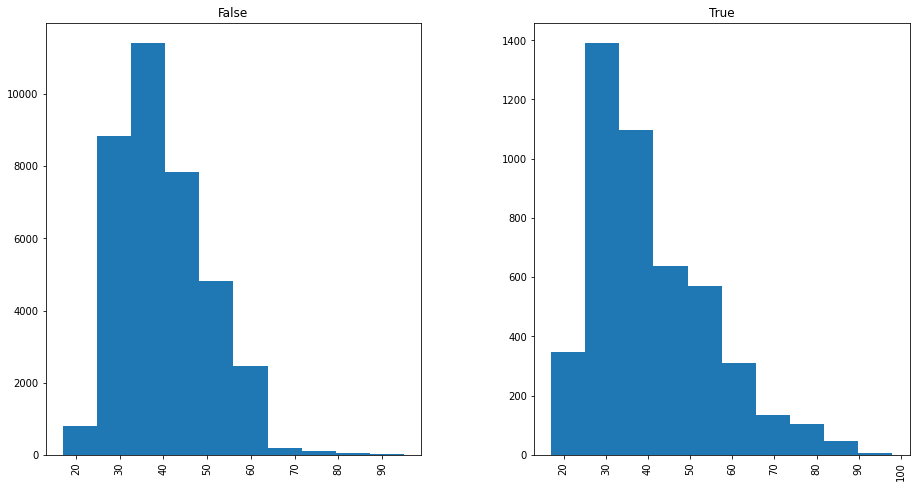

In [9]:
data['age'].hist(by = data.y, figsize=(15,8))

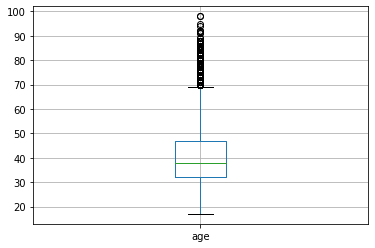

In [10]:
data.boxplot('age')

### The above boxplot shows that there are so many outliers in the data of age column. There are some values close to 100 which may not be approriate.

In [11]:
Q3 = data['age'].quantile(q = 0.75)
Q1 = data['age'].quantile(q = 0.25)
IQR = Q3 - Q1
outlier_range = [(Q1-(1.5*IQR)),(Q3+(1.5*IQR))]
print("The values out of this",outlier_range,"range are considered as outliers")

The values out of this [9.5, 69.5] range are considered as outliers


In [12]:
data['age'].loc[ (data['age']>outlier_range[1]) | (data['age']<outlier_range[0]) ].count()

469

In [13]:
data['age'].median()

38.0

#### So, there are total 469 outliers in the whole data. Now those values are replaced with the median value i.e., 38

In [14]:
data['age'].loc[ (data['age']>69.5) | (data['age']<9.5) ] = data['age'].median()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


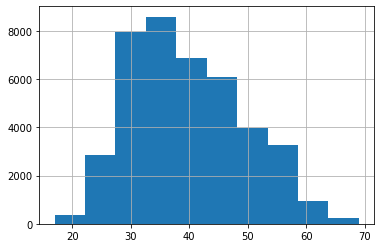

In [15]:
data['age'].hist()

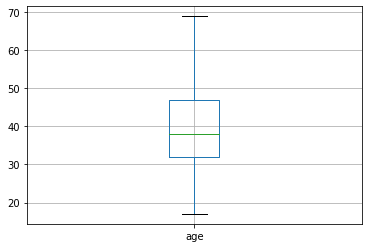

In [16]:
data.boxplot('age')

#### 1.2 Job, Marital, Education, Default, Housing, Loan, Contact, month, day_of_week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b02e7460>,
      dtype=object)

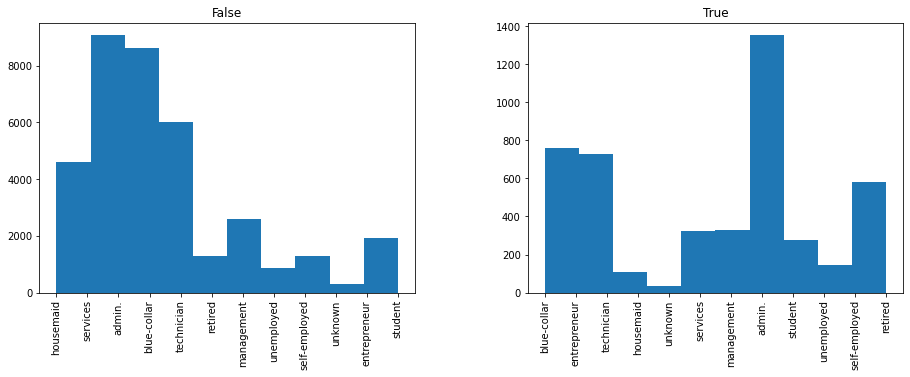

In [17]:
data['job'].hist(by=data.y, figsize=(15,5))

In [18]:
labelencoder_job = LabelEncoder()
data['job'] = labelencoder_job.fit_transform(data['job']) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b0a534c0>,
      dtype=object)

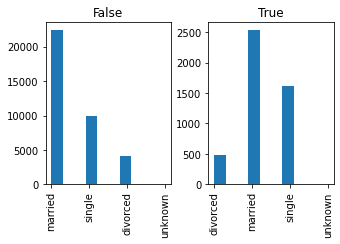

In [19]:
data['marital'].hist(by=data.y, figsize=(5,3))

In [20]:
labelencoder_marital = LabelEncoder()
data['marital'] = labelencoder_marital.fit_transform(data['marital'])

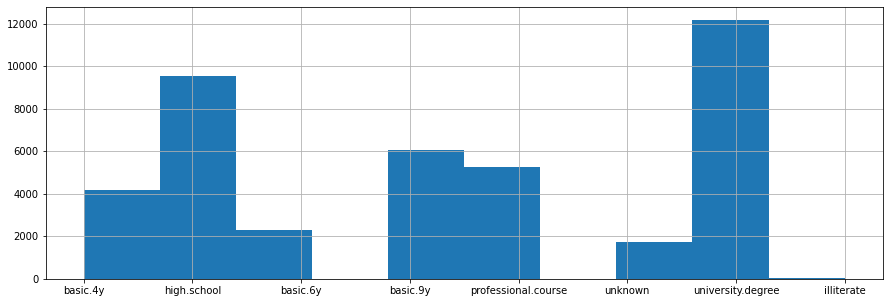

In [21]:

data['education'].hist(figsize=(15,5))

In [22]:
labelencoder_education = LabelEncoder()
data['education'] = labelencoder_education.fit_transform(data['education'])

In [23]:
data['default'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

no         79.12 %
unknown    20.87 %
yes         0.01 %
Name: default, dtype: object

In [24]:
labelencoder_default = LabelEncoder()
data['default'] = labelencoder_default.fit_transform(data['default'])

In [25]:
data['housing'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

yes        52.38 %
no         45.21 %
unknown      2.4 %
Name: housing, dtype: object

In [26]:
labelencoder_housing = LabelEncoder()
data['housing'] = labelencoder_housing.fit_transform(data['housing'])

In [27]:
data['loan'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

no         82.43 %
yes        15.17 %
unknown      2.4 %
Name: loan, dtype: object

In [28]:
labelencoder_loan = LabelEncoder()
data['loan'] = labelencoder_loan.fit_transform(data['loan'])

In [29]:
data['contact'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

cellular     63.47 %
telephone    36.53 %
Name: contact, dtype: object

In [30]:
labelencoder_contact = LabelEncoder()
data['contact'] = labelencoder_contact.fit_transform(data['contact'])

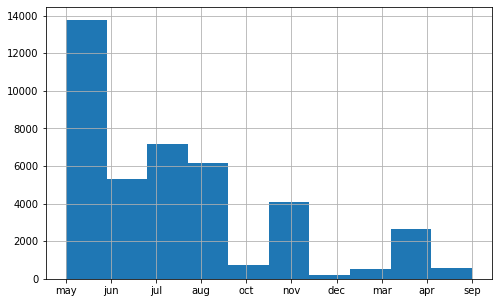

In [31]:
data['month'].hist(figsize = (8,5))

In [32]:
labelencoder_month = LabelEncoder()
data['month'] = labelencoder_month.fit_transform(data['month'])

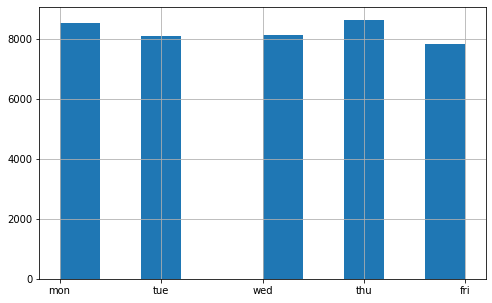

In [33]:
data['day_of_week'].hist(figsize = (8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12afef1a00>,
      dtype=object)

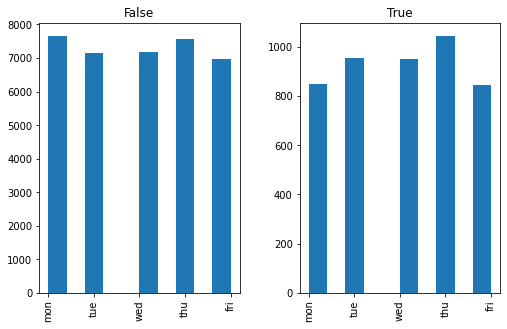

In [34]:
data['day_of_week'].hist(figsize = (8,5), by=data.y)

In [35]:
data['day_of_week'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

thu    20.94 %
mon    20.67 %
wed    19.75 %
tue    19.64 %
fri     19.0 %
Name: day_of_week, dtype: object

In [36]:
labelencoder_day_of_week = LabelEncoder()
data['day_of_week'] = labelencoder_day_of_week.fit_transform(data['day_of_week'])

#### Almost same

#### 1.3 duration

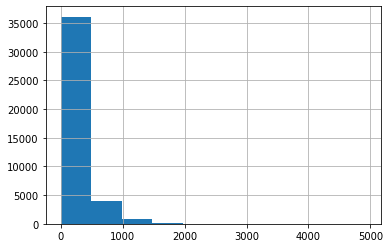

In [37]:
data['duration'].hist()

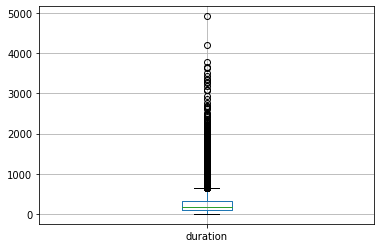

In [38]:
data.boxplot('duration')

In [39]:
Q3 = data['duration'].quantile(q = 0.75)
Q1 = data['duration'].quantile(q = 0.25)
IQR = Q3 - Q1
outlier_range = [(Q1-(1.5*IQR)),(Q3+(1.5*IQR))]
print(outlier_range)

[-223.5, 644.5]


In [40]:
data['duration'].loc[ (data['duration']>644.5) | (data['duration']<-223.5) ].count()

2963

In [41]:
data['duration'].median()

180.0

#### There are 2,963 outliers in the column which are replaced with the median value i.e., 180

In [42]:
data['duration'].loc[ (data['duration']>644.5) | (data['duration']<-223.5) ] = data['duration'].median()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


#### 1.4 campaign

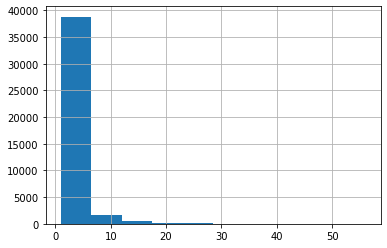

In [43]:
data['campaign'].hist()

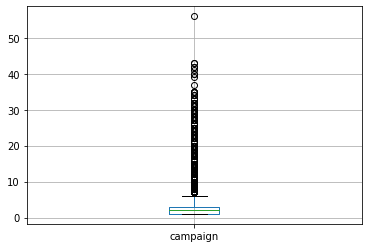

In [44]:
data.boxplot('campaign')

In [45]:
Q3 = data['campaign'].quantile(q = 0.75)
Q1 = data['campaign'].quantile(q = 0.25)
IQR = Q3 - Q1
outlier_range = [(Q1-(1.5*IQR)),(Q3+(1.5*IQR))]
print(outlier_range)

[-2.0, 6.0]


In [46]:
data['campaign'].loc[ (data['campaign']<-2.0) | (data['campaign']>6.0) ].count()

2406

In [47]:
data['campaign'].median()

2.0

#### There are 2,406 outliers in the column which are replaced with the median value i.e., 2

In [48]:
data['campaign'].loc[ (data['campaign']<-2.0) | (data['campaign']>6.0) ] = data['campaign'].median()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


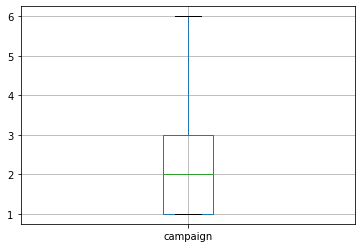

In [49]:

data.boxplot('campaign')

#### 1.5 pdays

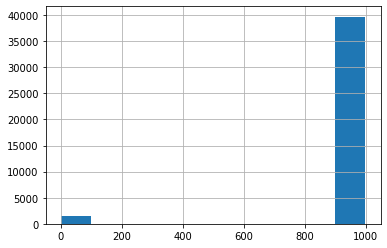

In [50]:
data['pdays'].hist()

In [51]:
data['pdays'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

999    96.32 %
3       1.07 %
6        1.0 %
4       0.29 %
9       0.16 %
2       0.15 %
7       0.15 %
12      0.14 %
10      0.13 %
5       0.11 %
13      0.09 %
11      0.07 %
1       0.06 %
15      0.06 %
14      0.05 %
8       0.04 %
0       0.04 %
16      0.03 %
17      0.02 %
18      0.02 %
22      0.01 %
19      0.01 %
21       0.0 %
25       0.0 %
26       0.0 %
27       0.0 %
20       0.0 %
Name: pdays, dtype: object

#### 96.32% of pdays column is 999 which indicates previously customers are not contacted

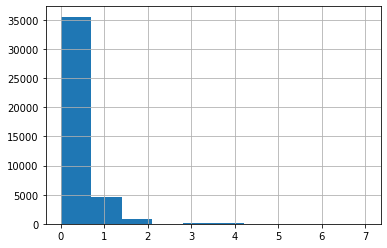

In [52]:
data['previous'].hist()

In [53]:
data['previous'].value_counts().apply(lambda x: str(round(x/data.shape[0]*100,2))+' %')

0    86.34 %
1    11.07 %
2     1.83 %
3     0.52 %
4     0.17 %
5     0.04 %
6     0.01 %
7      0.0 %
Name: previous, dtype: object

In [54]:
data['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [55]:
labelencoder_poutcome = LabelEncoder()
data['poutcome'] = labelencoder_poutcome.fit_transform(data['poutcome'])

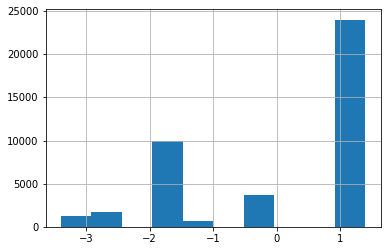

In [56]:
data['emp_var_rate'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12afa85640>,
      dtype=object)

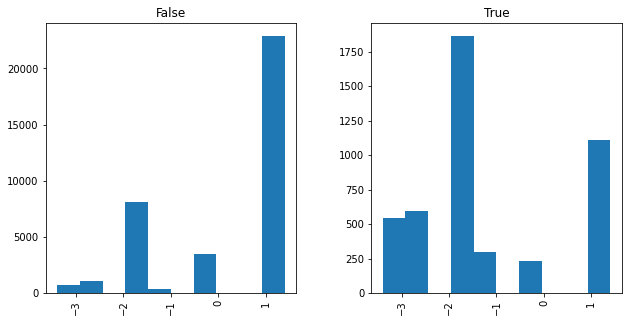

In [57]:
data['emp_var_rate'].hist(figsize=(10,5),by=data.y)

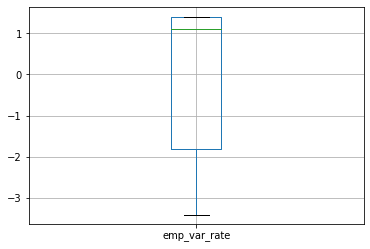

In [58]:
data.boxplot('emp_var_rate')

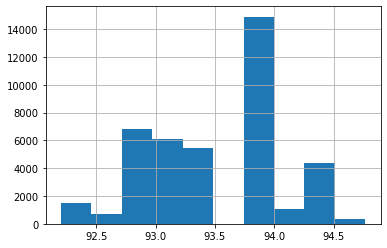

In [59]:
data['cons_price_idx'].hist()

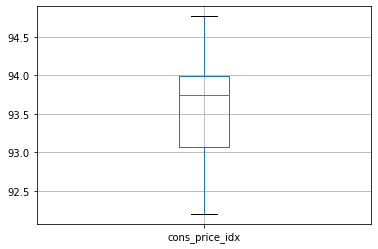

In [60]:
data.boxplot('cons_price_idx')

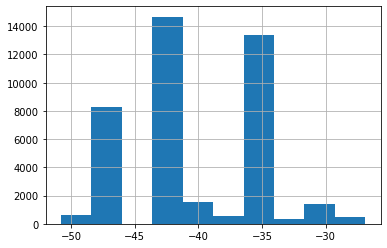

In [61]:
data['cons_conf_idx'].hist()

In [62]:
#columns=['cons_conf_idx','emp_var_rate','nr_employed','previous','pdays','euribor3m','duration']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12af875c10>,
      dtype=object)

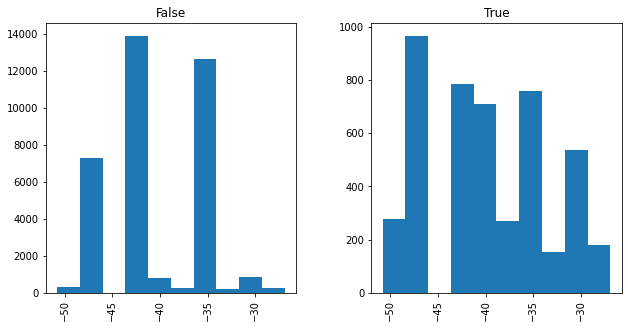

In [63]:
data['cons_conf_idx'].hist(by=data.y,figsize=(10,5))

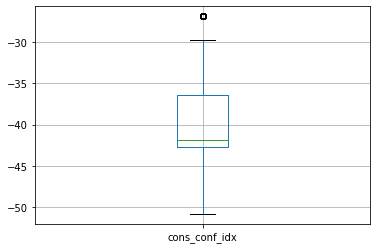

In [64]:
data.boxplot('cons_conf_idx')

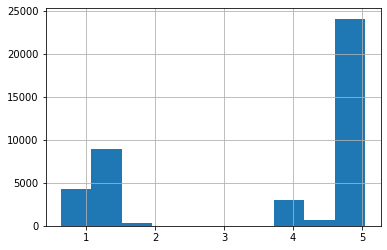

In [65]:
data['euribor3m'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12af725cd0>,
      dtype=object)

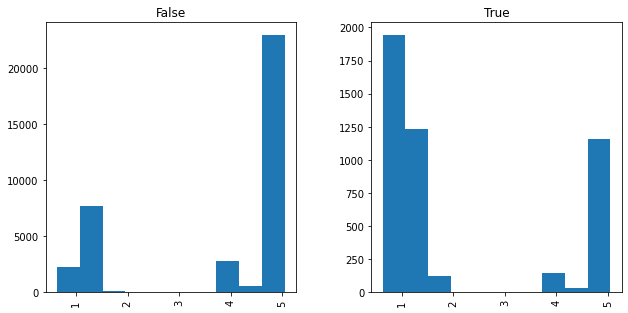

In [66]:
data['euribor3m'].hist(by=data.y, figsize=(10,5))

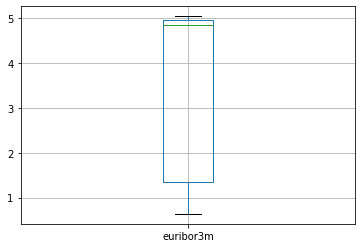

In [67]:
data.boxplot('euribor3m')

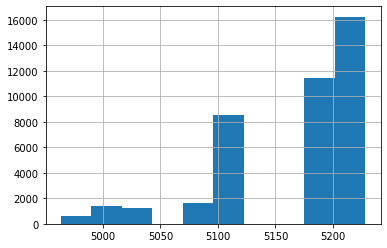

In [68]:
data['nr_employed'].hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f12b03caa00>,
      dtype=object)

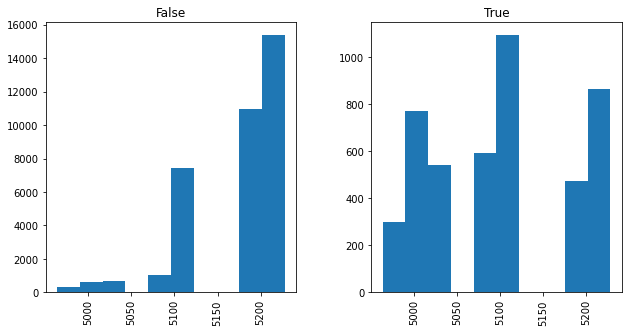

In [69]:
data['nr_employed'].hist(by=data.y, figsize=(10,5))

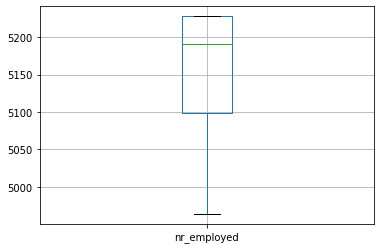

In [70]:
data.boxplot('nr_employed')

In [71]:
data['y'].value_counts()

False    36548
True      4640
Name: y, dtype: int64

In [72]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.013319,-0.388218,-0.096381,0.190996,-0.004007,-0.007706,0.032983,-0.030436,-0.020675,...,0.010070,0.006077,-0.021807,0.016559,0.070915,0.036777,0.100922,0.083770,0.067991,-0.020232
job,-0.013319,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,...,-0.009226,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.388218,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,...,-0.010307,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.096381,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,...,-0.001872,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.190996,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,...,0.026526,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.004007,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,...,-0.007754,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007706,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,...,0.013417,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.032983,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,...,0.043548,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.030436,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,...,-0.041172,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.020675,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,...,-0.051654,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


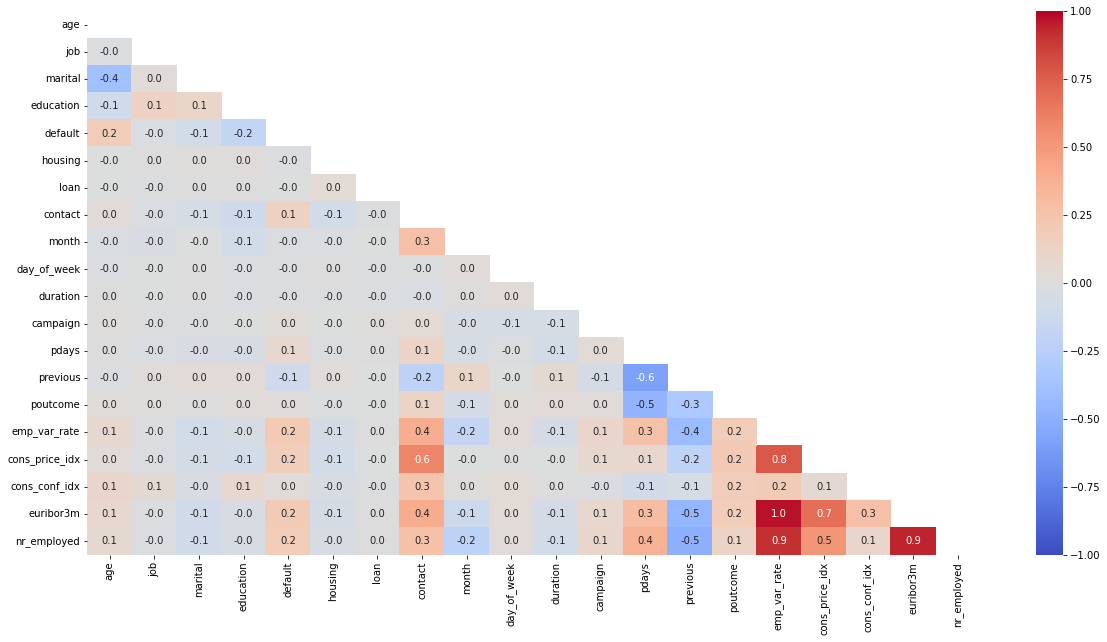

In [73]:
# corr=data.corr()
# sns.heatmap(corr, annot=True)
data1 = data.drop(columns=['y'])
fig, ax = plt.subplots(figsize = (20, 10))
matrix = np.triu(data1.corr())
sns.heatmap(data1.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

### 2. Data Preparation

### First we will consider all the columns and will prepare the training and testing data which is version 1

In [74]:
input_data = data.drop(columns=['y'])
output_data = data['y']

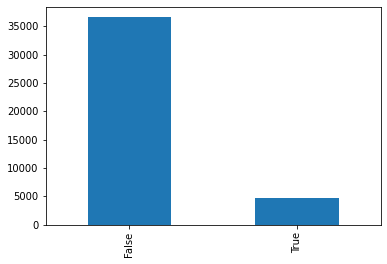

In [75]:
output_data.value_counts().plot(kind='bar')

In [76]:
oversample = SMOTE()
input_data, output_data = oversample.fit_resample(input_data, output_data)

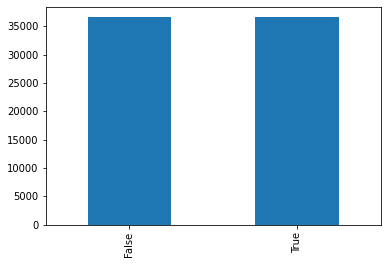

In [77]:
output_data.value_counts().plot(kind='bar')

In [78]:
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=0.2, random_state=1, stratify=output_data)

In [79]:
y_train.value_counts()

True     29238
False    29238
Name: y, dtype: int64

In [80]:
X_train.shape

(58476, 20)

In [81]:
X_test.shape

(14620, 20)

### Models

## Without feature selection

# K-Near Neighbors

In [82]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[6655  655]
 [ 197 7113]]
94.0


# Support Vector Machine	

In [84]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)

[[3624 3686]
 [3673 3637]]
50.0


# Decision Tree Classifier

In [85]:
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)
print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)

[[6709  601]
 [ 439 6871]]
93.0


# Random Forest Classifier

In [86]:
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)
print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)

[[6856  454]
 [ 243 7067]]
95.0


# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
#logmodel = LogisticRegression() 
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)
print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[6041 1269]
 [1727 5583]]
80.0


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# XGBoost

In [88]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)
print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)

[[6470  840]
 [ 377 6933]]
92.0


# Classification Reports Version 1

In [89]:
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVM Reports\n',classification_report(y_test, svcpred))
print('Random Forest Reports\n',classification_report(y_test, rfcpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Logistic Regression Reports\n',classification_report(y_test, logpred))
print('XGBoost Reports\n',classification_report(y_test, xgbprd))

KNN Reports
               precision    recall  f1-score   support

       False       0.97      0.91      0.94      7310
        True       0.92      0.97      0.94      7310

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94      0.94      0.94     14620

SVM Reports
               precision    recall  f1-score   support

       False       0.50      0.50      0.50      7310
        True       0.50      0.50      0.50      7310

    accuracy                           0.50     14620
   macro avg       0.50      0.50      0.50     14620
weighted avg       0.50      0.50      0.50     14620

Random Forest Reports
               precision    recall  f1-score   support

       False       0.97      0.94      0.95      7310
        True       0.94      0.97      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95  

# 2. Feature Selection

## Logistic Regression

In [91]:
logit_ml = sm.Logit(data['y'],data.drop(columns=['y'])).fit()
logit_ml.summary2()

Optimization terminated successfully.
         Current function value: 0.264965
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.247     
Dependent Variable: y                AIC:              21866.7590
Date:               2022-12-14 06:34 BIC:              22039.2770
No. Observations:   41188            Log-Likelihood:   -10913.   
Df Model:           19               LL-Null:          -14499.   
Df Residuals:       41168            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
age              -0.0013   0.0020  -0.6836 0.4943 -0.0052  0.0025
job               0.0047   0.0050   0.9433 0.3456 -0.0051  0.0145
marital           0.0557   0.0321   1.7372 0.0824 -0.0071  0.1186
education         0.0347   0.0088   3.9408 0.0001  0.0174  0.0519
default          -0.2847   0.0573  -4.9670 0.0000 -0.3970 -0.1723
housing          -0.0089   0.0183  -0.4862 0.6268 -0.0448  0.0270
loan             -0.0071   0.0251  -0.2820 0.7780 -0.0563  0.0421
contact          -0.6857   0.0527 -13.0154 0.0000 -0.7889 -0.5824
month            -0.0988   0.0076 -12.9812 0.0000 -0.1137 -0.0839
day_of_week       0.0512   0.0131   3.9185 0.0001  0.0256  0.0768
duration          0.0043   0.0001  36.1873 0.0000  0.0040  0.0045
campaign         -0.0019   0.0155  -0.1220 0.9029 -0.0323  0.0285
pdays            -0.0010   0.0002  -6.6821 0.0000 -0.0013 -0.0007
previous         -0.0819   0.0536  -1.5273 0.1267 -0.1870  0.0232
poutcome          0.4204   0.0723   5.8123 0.0000  0.2786  0.5621
emp_var_rate     -0.8094   0.0578 -14.0103 0.0000 -0.9226 -0.6961
cons_price_idx    0.6367   0.0281  22.6548 0.0000  0.5816  0.6918
cons_conf_idx     0.0146   0.0041   3.6054 0.0003  0.0067  0.0225
euribor3m         0.6534   0.0671   9.7385 0.0000  0.5219  0.7849
nr_employed      -0.0123   0.0006 -22.3107 0.0000 -0.0134 -0.0112
=================================================================

"""

##### Considering 90% confidence level then columns age, job, housing, loan, campaign, previous are eliminated from the consideration. Other than the previous mentioned columns, all columns are considered and make input data including those columns -- (1)

### From (Logistic Regression_2) will prepare the version 2 training and testing data

In [92]:
input_data_90_conf_2 = input_data.drop(columns=['age','job','housing','loan','campaign','previous'])

In [93]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(input_data_90_conf_2, output_data, test_size=0.2, random_state=1, stratify=output_data)

In [94]:
y_train_2.value_counts()

True     29238
False    29238
Name: y, dtype: int64

In [95]:
X_train_2.shape

(58476, 14)

In [96]:
X_test_2.shape

(14620, 14)

# K-Near Neighbors

In [97]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_2, y_train_2)
knnpred = knn.predict(X_test_2)
print(confusion_matrix(y_test_2, knnpred))
print(round(accuracy_score(y_test_2, knnpred),2)*100)

[[6726  584]
 [ 787 6523]]
91.0


# Support Vector Machine	

In [99]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train_2, y_train_2)
svcpred = svc.predict(X_test_2)
print(confusion_matrix(y_test_2, svcpred))
print(round(accuracy_score(y_test_2, svcpred),2)*100)

[[3873 3437]
 [3968 3342]]
49.0


# Decision Tree Classifier

In [100]:
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train_2, y_train_2)
dtreepred = dtree.predict(X_test_2)

print(confusion_matrix(y_test_2, dtreepred))
print(round(accuracy_score(y_test_2, dtreepred),2)*100)

[[6737  573]
 [ 528 6782]]
92.0


# Random Forest Classifier

In [101]:
rfc = RandomForestClassifier(n_estimators = 200)  #criterion = entopy,gini
rfc.fit(X_train_2, y_train_2)
rfcpred = rfc.predict(X_test_2)

print(confusion_matrix(y_test_2, rfcpred ))
print(round(accuracy_score(y_test_2, rfcpred),2)*100)

[[6807  503]
 [ 329 6981]]
94.0


# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
#logmodel = LogisticRegression() 
logmodel.fit(X_train_2,y_train_2)
logpred = logmodel.predict(X_test_2)
print(confusion_matrix(y_test_2, logpred))
print(round(accuracy_score(y_test_2, logpred),2)*100)

[[5857 1453]
 [1883 5427]]
77.0


# XGBoost

In [103]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_2, y_train_2)
xgbprd = xgb.predict(X_test_2)
print(confusion_matrix(y_test_2, xgbprd ))
print(round(accuracy_score(y_test_2, xgbprd),2)*100)

[[6383  927]
 [ 418 6892]]
91.0


# Classification Reports Version 2

In [104]:
print('KNN Reports\n',classification_report(y_test_2, knnpred))
print('SVM Reports\n',classification_report(y_test_2, svcpred))
print('Random Forest Reports\n',classification_report(y_test_2, rfcpred))
print('Decision Tree Reports\n',classification_report(y_test_2, dtreepred))
print('Logistic Regression Reports\n',classification_report(y_test_2, logpred))
print('XGBoost Reports\n',classification_report(y_test_2, xgbprd))

KNN Reports
               precision    recall  f1-score   support

       False       0.90      0.92      0.91      7310
        True       0.92      0.89      0.90      7310

    accuracy                           0.91     14620
   macro avg       0.91      0.91      0.91     14620
weighted avg       0.91      0.91      0.91     14620

SVM Reports
               precision    recall  f1-score   support

       False       0.49      0.53      0.51      7310
        True       0.49      0.46      0.47      7310

    accuracy                           0.49     14620
   macro avg       0.49      0.49      0.49     14620
weighted avg       0.49      0.49      0.49     14620

Random Forest Reports
               precision    recall  f1-score   support

       False       0.95      0.93      0.94      7310
        True       0.93      0.95      0.94      7310

    accuracy                           0.94     14620
   macro avg       0.94      0.94      0.94     14620
weighted avg       0.94  

##Chi square test

In [105]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [106]:
selector = SelectKBest(chi2)

In [107]:
selector.fit(data.drop(['cons_conf_idx','emp_var_rate','y'],axis=1), data['y'])

SelectKBest(score_func=<function chi2 at 0x7f12a01234c0>)

In [108]:
#final=chi2(X,y)
#pvalues=pd.Series(final[1])
#pvalues.index=X.columns

In [109]:
#creating dataframe of features and their p values from lowest to highest, low p values are most correlated with output
data_new=pd.DataFrame({'Features':data.drop(['cons_conf_idx','emp_var_rate','y'],axis=1).columns, 'P-Value':selector.pvalues_}).sort_values(by='P-Value')

In [110]:
data_new

,Features,P-Value
17,nr_employed,0.000000e+00
13,previous,0.000000e+00
12,pdays,0.000000e+00
16,euribor3m,0.000000e+00
10,duration,0.000000e+00
7,contact,3.500598e-121
4,default,5.521476e-72
3,education,2.464796e-38
14,poutcome,3.722828e-23
1,job,2.179406e-21


In [111]:
data_final=data_new[data_new['P-Value'] > 0]
data_final

,Features,P-Value
7,contact,3.500598e-121
4,default,5.521476e-72
3,education,2.464796e-38
14,poutcome,3.722828e-23
1,job,2.179406e-21
11,campaign,1.030246e-16
0,age,3.399709e-10
2,marital,1.348325e-07
9,day_of_week,1.380665e-03
5,housing,2.566075e-02


### From (Chi Square_3) will prepare the version 3 training and testing data

In [112]:
input_data_90_conf_3 = input_data.drop(columns=['cons_conf_idx','emp_var_rate','nr_employed','previous','pdays','euribor3m','duration'])
#output_data = data['y']

In [113]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(input_data_90_conf_3, output_data, test_size=0.2, random_state=1, stratify=output_data)

In [114]:
y_train_3.value_counts()

True     29238
False    29238
Name: y, dtype: int64

In [115]:
X_train_3.shape

(58476, 13)

In [116]:
X_test_3.shape

(14620, 13)

# K-Near Neighbors

In [117]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [118]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_3, y_train_3)
knnpred = knn.predict(X_test_3)
print(confusion_matrix(y_test_3, knnpred))
print(round(accuracy_score(y_test_3, knnpred),2)*100)

[[6559  751]
 [1800 5510]]
83.0


# Support Vector Machine	

In [119]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train_3, y_train_3)
svcpred = svc.predict(X_test_3)
print(confusion_matrix(y_test_3, svcpred))
print(round(accuracy_score(y_test_3, svcpred),2)*100)

[[3212 4098]
 [2126 5184]]
56.99999999999999


# Decision Tree Classifier

In [120]:
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train_3, y_train_3)
dtreepred = dtree.predict(X_test_3)
print(confusion_matrix(y_test_3, dtreepred))
print(round(accuracy_score(y_test_3, dtreepred),2)*100)

[[6203 1107]
 [ 914 6396]]
86.0


# Random Forest Classifier

In [121]:
rfc = RandomForestClassifier(n_estimators = 200)  #criterion = entopy,gini
rfc.fit(X_train_3, y_train_3)
rfcpred = rfc.predict(X_test_3)
print(confusion_matrix(y_test_3, rfcpred ))
print(round(accuracy_score(y_test_3, rfcpred),2)*100)

[[6584  726]
 [ 713 6597]]
90.0


# Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000)
logmodel.fit(X_train_3,y_train_3)
logpred = logmodel.predict(X_test_3)
print(confusion_matrix(y_test_3, logpred))
print(round(accuracy_score(y_test_3, logpred),2)*100)

[[4766 2544]
 [1526 5784]]
72.0


# XGBoost

In [123]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_3, y_train_3)
xgbprd = xgb.predict(X_test_3)
print(confusion_matrix(y_test_3, xgbprd ))
print(round(accuracy_score(y_test_3, xgbprd),2)*100)

[[6342  968]
 [1507 5803]]
83.0




```
# This is formatted as code
```

# Classification Report Version 3

In [124]:
print('KNN Reports\n',classification_report(y_test_3, knnpred))
print('SVM Reports\n',classification_report(y_test_3, svcpred))
print('Random Forest Reports\n',classification_report(y_test_3, rfcpred))
print('Decision Tree Reports\n',classification_report(y_test_3, dtreepred))
print('Logistic Regression Reports\n',classification_report(y_test_3, logpred))
print('XGBoost Reports\n',classification_report(y_test_3, xgbprd))

KNN Reports
               precision    recall  f1-score   support

       False       0.78      0.90      0.84      7310
        True       0.88      0.75      0.81      7310

    accuracy                           0.83     14620
   macro avg       0.83      0.83      0.82     14620
weighted avg       0.83      0.83      0.82     14620

SVM Reports
               precision    recall  f1-score   support

       False       0.60      0.44      0.51      7310
        True       0.56      0.71      0.62      7310

    accuracy                           0.57     14620
   macro avg       0.58      0.57      0.57     14620
weighted avg       0.58      0.57      0.57     14620

Random Forest Reports
               precision    recall  f1-score   support

       False       0.90      0.90      0.90      7310
        True       0.90      0.90      0.90      7310

    accuracy                           0.90     14620
   macro avg       0.90      0.90      0.90     14620
weighted avg       0.90  